In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 한글이 포함된 csv파일 불러오기
file_path = '/content/health_check.CSV'
data = pd.read_csv(file_path, encoding='cp949')
data.head()

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장,체중,허리둘레,시력,시력.1,...,요단백,혈청크레아티닌,혈청지오티,혈청지피티,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,...,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN
1,2022,765435,41,2,9,150,45,68.0,1.0,1.0,...,1.0,0.8,19.0,10.0,7.0,1.0,1.0,0,NaN,NaN
2,2022,343621,41,2,13,150,60,78.8,1.0,1.0,...,1.0,0.8,17.0,15.0,15.0,1.0,1.0,0,NaN,NaN
3,2022,3393534,41,2,6,160,50,69.0,1.0,1.0,...,1.0,0.8,25.0,16.0,13.0,1.0,1.0,0,NaN,NaN
4,2022,1716951,41,2,7,160,55,75.0,1.0,1.0,...,1.0,0.8,22.0,22.0,15.0,1.0,1.0,0,NaN,NaN


In [ ]:
#한글폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
#한글폰트 적용
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

## 1.나이 분포를 히스토그램으로 나타내세요


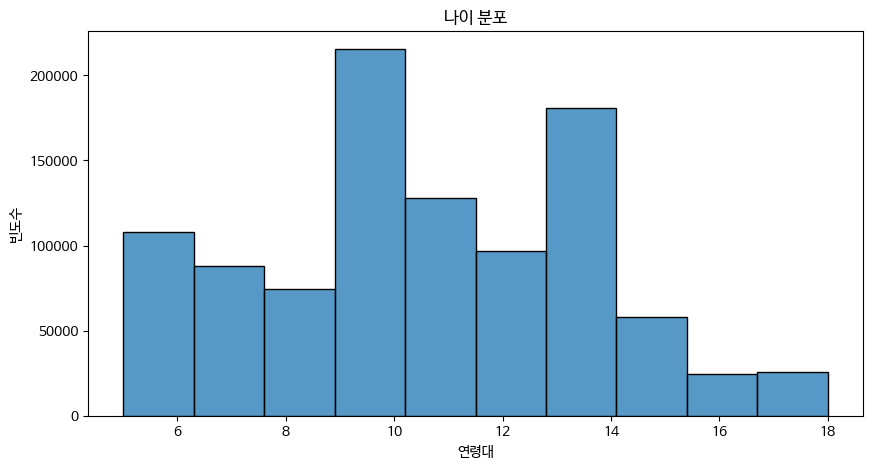

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data['연령대코드(5세단위)'], bins=10, kde=False)
plt.title('나이 분포')
plt.xlabel('연령대')
plt.ylabel('빈도수')
plt.show()

## 2.남성과 여성 참가자의 수를 바 차트로 나타내기

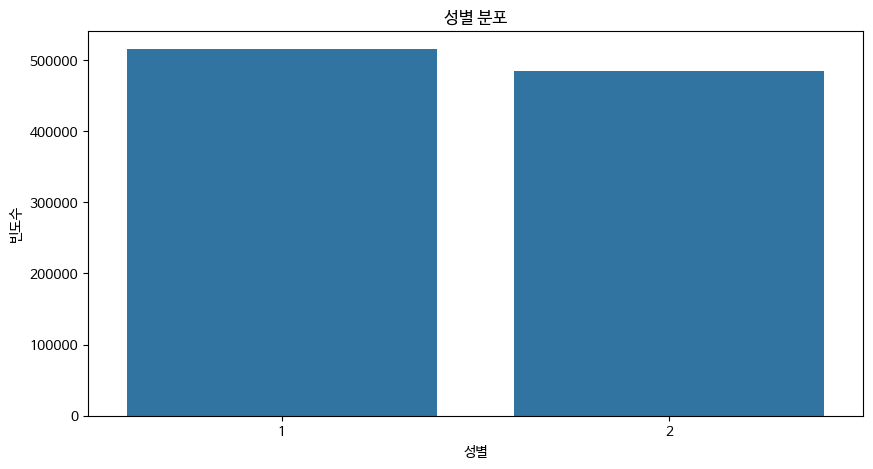

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='성별', data=data)
plt.title('성별 분포')
plt.xlabel('성별')
plt.ylabel('빈도수')
plt.show()

## 3. 키와 몸무게를 사용하여 BMI를 게산하고, BMI 값의 히스토그램을 만드세요
- BMI = 체중/(신장/100)*2

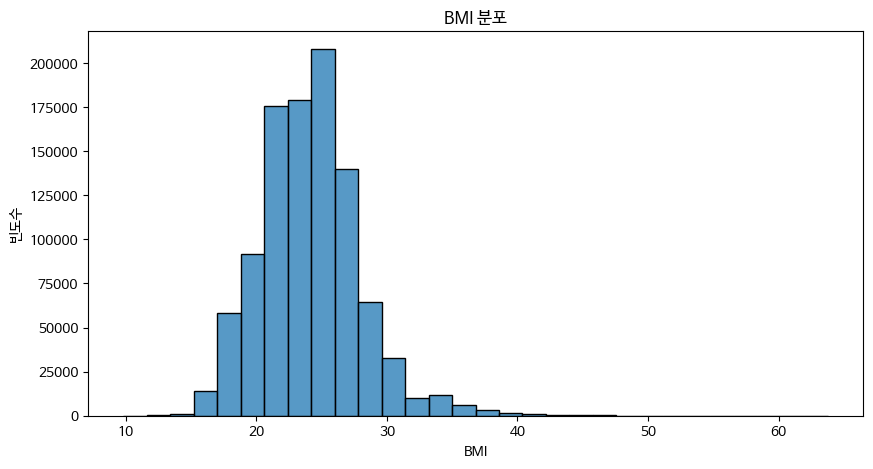

In [ ]:
data['BMI'] = data['체중'] / (data['신장'] / 100) ** 2

plt.figure(figsize=(10, 5))
sns.histplot(data['BMI'].dropna(), bins=30, kde=False)
plt.title('BMI 분포')
plt.xlabel('BMI')
plt.ylabel('빈도수')
plt.show()


##4. 성별에 따른 BMI 값의 박스 플롯을 만드세요.

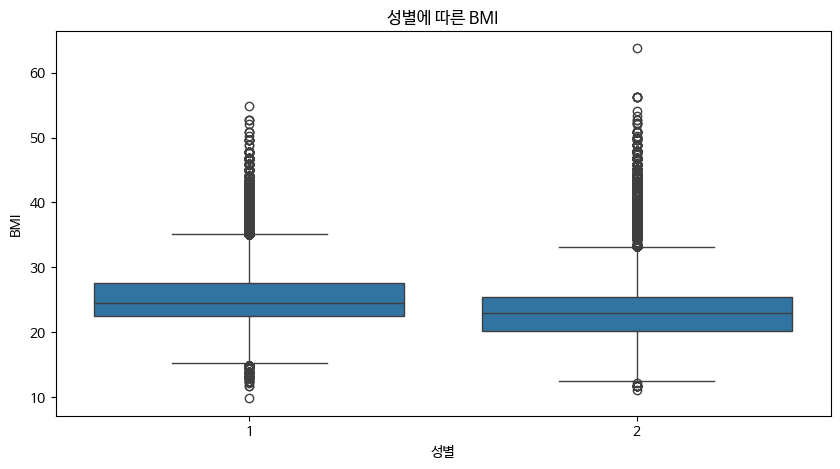

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='성별', y='BMI', data=data)
plt.title('성별에 따른 BMI')
plt.xlabel('성별')
plt.ylabel('BMI')
plt.show()


##5. 수축기혈압과 이완기혈압을 비교하는 산점도를 만드세요

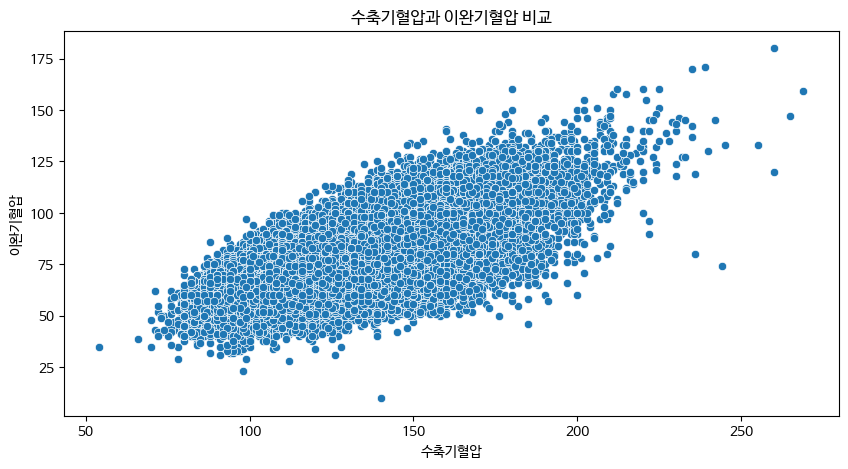

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='수축기혈압', y='이완기혈압', data=data)
plt.title('수축기혈압과 이완기혈압 비교')
plt.xlabel('수축기혈압')
plt.ylabel('이완기혈압')
plt.show()

##6. 연령대별 평균 수축기혈압을 선 그래프로 나타내세요.

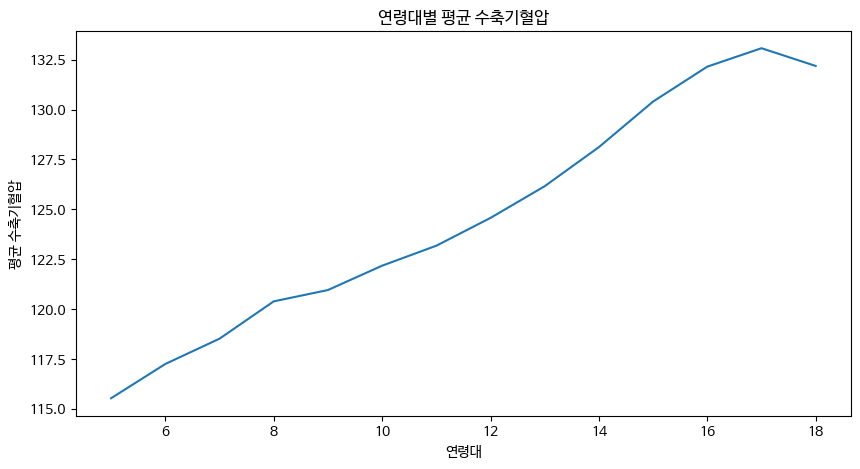

In [ ]:
avg_systolic_by_age = data.groupby('연령대코드(5세단위)')['수축기혈압'].mean()
plt.figure(figsize=(10, 5))
avg_systolic_by_age.plot(kind='line')
plt.title('연령대별 평균 수축기혈압')
plt.xlabel('연령대')
plt.ylabel('평균 수축기혈압')
plt.show()

##7. 총콜레스테롤 수치의 KDE 플롯을 만드세요

<ipython-input-86-cb6c2a630f58>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['총콜레스테롤'].dropna(), shade=True)


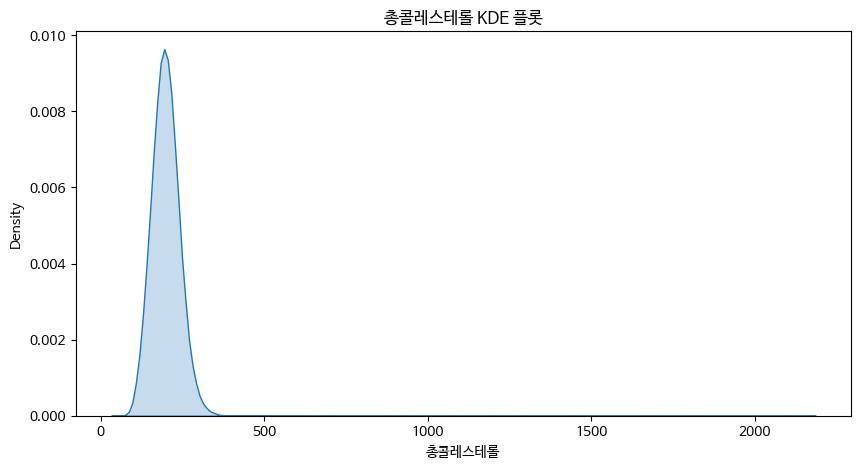

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data['총콜레스테롤'].dropna(), shade=True)
plt.title('총콜레스테롤 KDE 플롯')
plt.xlabel('총콜레스테롤')
plt.ylabel('Density')
plt.show()

##8. 성별에 따른 총콜레스테롤의 바이올린 플롯을 만드세요.

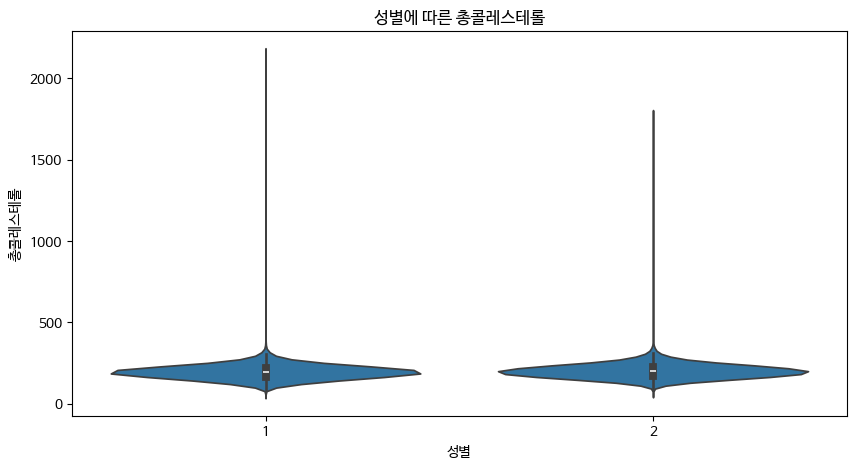

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='성별', y='총콜레스테롤', data=data)
plt.title('성별에 따른 총콜레스테롤')
plt.xlabel('성별')
plt.ylabel('총콜레스테롤')
plt.show()

## 9. 허리둘레의 히스토그램을 만드세요

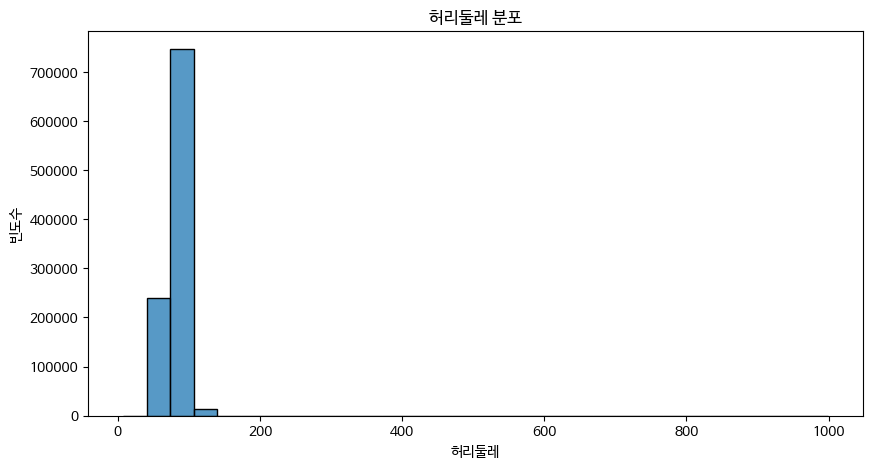

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data['허리둘레'].dropna(), bins=30, kde=False)
plt.title('허리둘레 분포')
plt.xlabel('허리둘레')
plt.ylabel('빈도수')
plt.show()


##10. 연령대별 평균 허리둘레를 바 차트로 나타내세요.

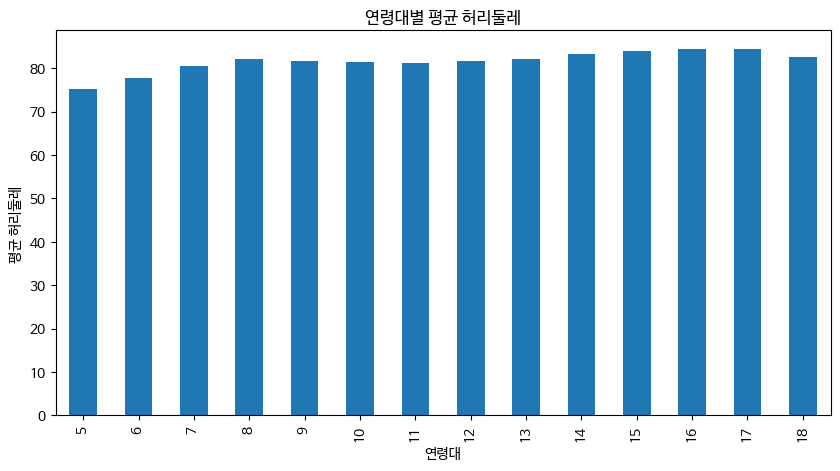

In [ ]:
avg_waist_by_age = data.groupby('연령대코드(5세단위)')['허리둘레'].mean()
plt.figure(figsize=(10, 5))
avg_waist_by_age.plot(kind='bar')
plt.title('연령대별 평균 허리둘레')
plt.xlabel('연령대')
plt.ylabel('평균 허리둘레')
plt.show()

## 11. 흡연자와 비흡연자의 수를 나타내는 카운트 플롯을 만드세요

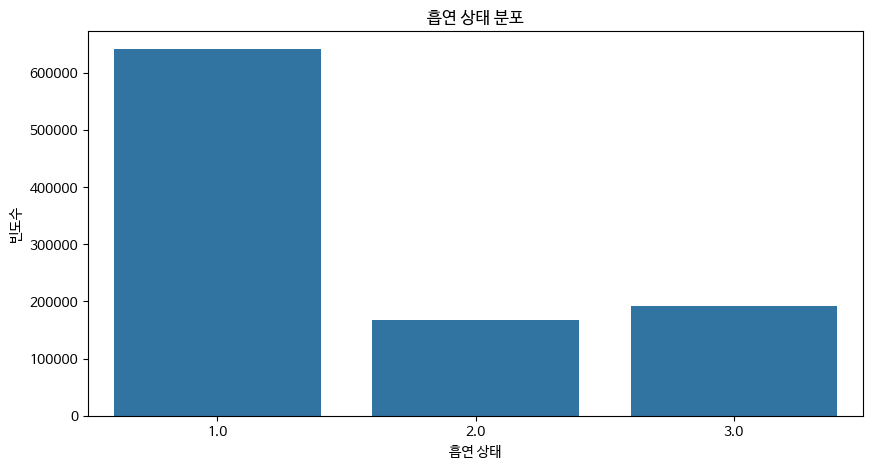

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='흡연상태', data=data)
plt.title('흡연 상태 분포')
plt.xlabel('흡연 상태')
plt.ylabel('빈도수')
plt.show()

##12. 음주 여부에 따른 평균 수축기혈압을 바 차트로 나타내세요

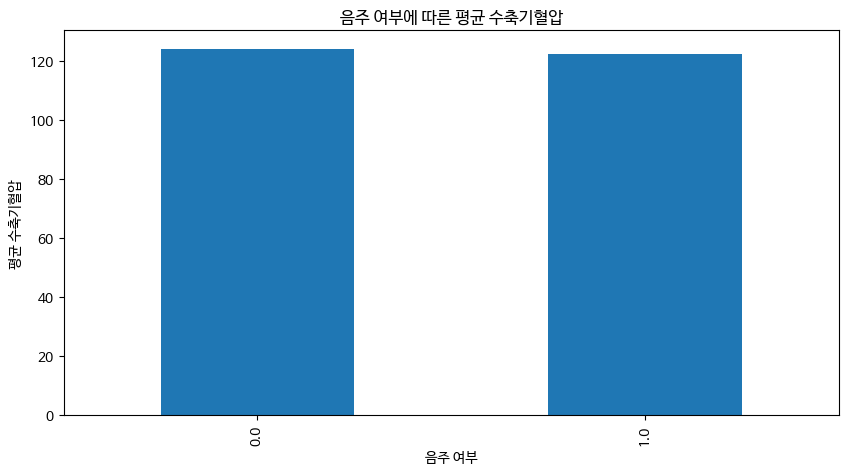

In [ ]:
avg_bp_by_drinking = data.groupby('음주여부')['수축기혈압'].mean()
plt.figure(figsize=(10, 5))
avg_bp_by_drinking.plot(kind='bar')
plt.title('음주 여부에 따른 평균 수축기혈압')
plt.xlabel('음주 여부')
plt.ylabel('평균 수축기혈압')
plt.show()

## 13. 결측치가 10% 이상인 열을 식별하고, 각 열의 결측치 비율을 바 차트로 나타내세요.

In [ ]:
missing_data = data.isnull().mean() * 100
columns_with_missing_data = missing_data[missing_data > 10]

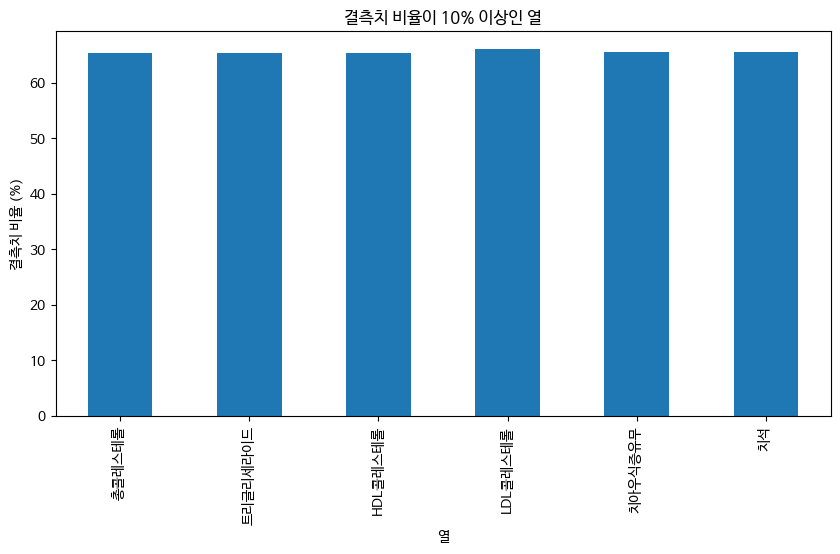

In [ ]:
plt.figure(figsize=(10, 5))
columns_with_missing_data.plot(kind='bar')
plt.title('결측치 비율이 10% 이상인 열')
plt.xlabel('열')
plt.ylabel('결측치 비율 (%)')
plt.show()

## 14. 허리둘레 열의 결측치를 중앙값으로 채우고, 채운 데이터의 히스토그램을 만드세요.

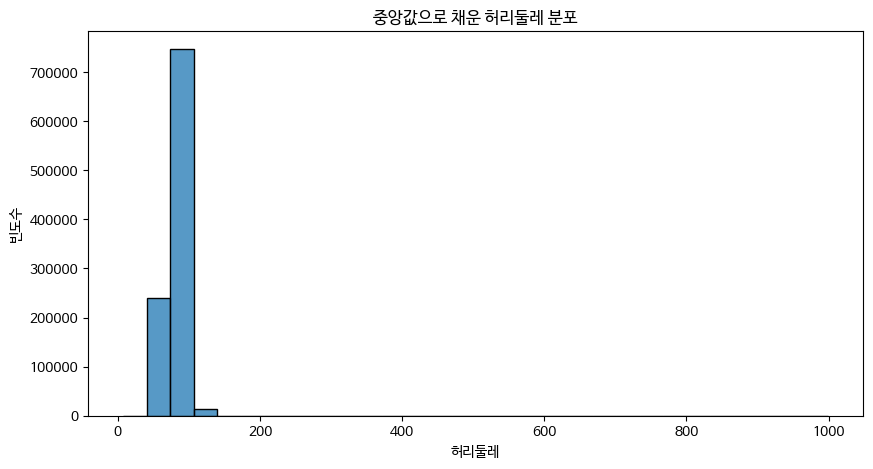

In [ ]:
data['허리둘레'].fillna(data['허리둘레'].median(), inplace=True)

plt.figure(figsize=(10, 5))
sns.histplot(data['허리둘레'], bins=30, kde=False)
plt.title('중앙값으로 채운 허리둘레 분포')
plt.xlabel('허리둘레')
plt.ylabel('빈도수')
plt.show()

## 15. 공복혈당 수치의 히스토그램을 만드세요

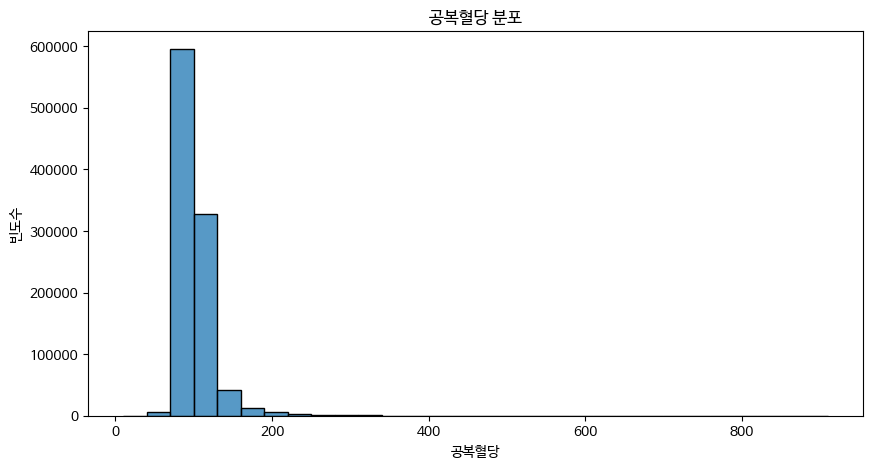

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data['식전혈당'].dropna(), bins=30, kde=False)
plt.title('공복혈당 분포')
plt.xlabel('공복혈당')
plt.ylabel('빈도수')
plt.show()

## 16. 연령대별 평균 식전혈당을 선 그래프로 나타내세요

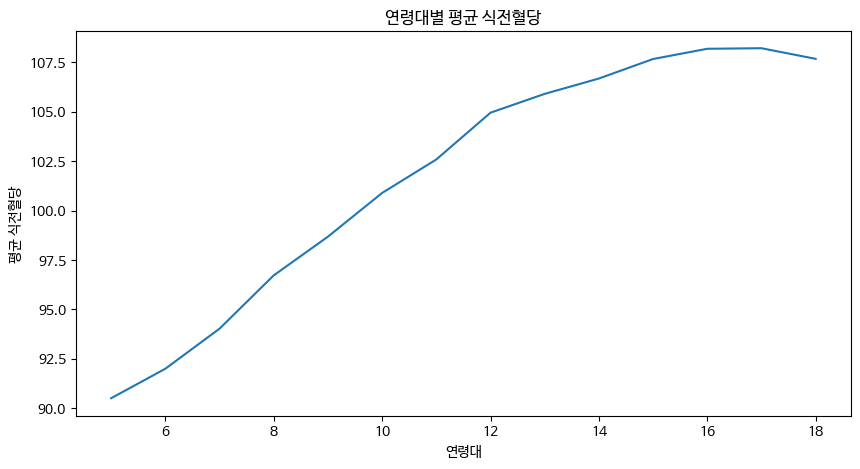

In [ ]:
avg_glucose_by_age = data.groupby('연령대코드(5세단위)')['식전혈당'].mean()
plt.figure(figsize=(10, 5))
avg_glucose_by_age.plot(kind='line')
plt.title('연령대별 평균 식전혈당')
plt.xlabel('연령대')
plt.ylabel('평균 식전혈당')
plt.show()

## 17. BMI가 25 이상인 경우를 비만으로 간주하여 비만 여부에 따른 총콜레스테롤의 바이올린 플롯을 만드세요.

In [ ]:
data['비만여부'] = data['BMI'] >= 25

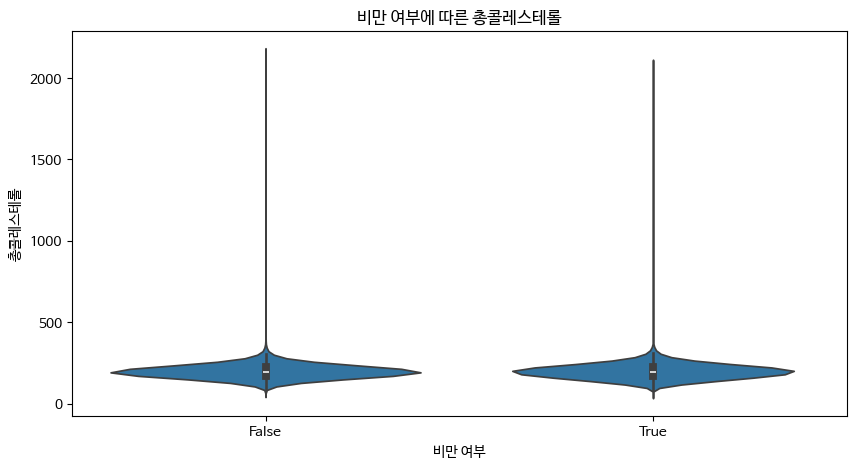

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='비만여부', y='총콜레스테롤', data=data)
plt.title('비만 여부에 따른 총콜레스테롤')
plt.xlabel('비만 여부')
plt.ylabel('총콜레스테롤')
plt.show()

## 18. 비만 여부에 따른 수축기혈압과 이완기혈압의 박스 플롯을 만드세요.

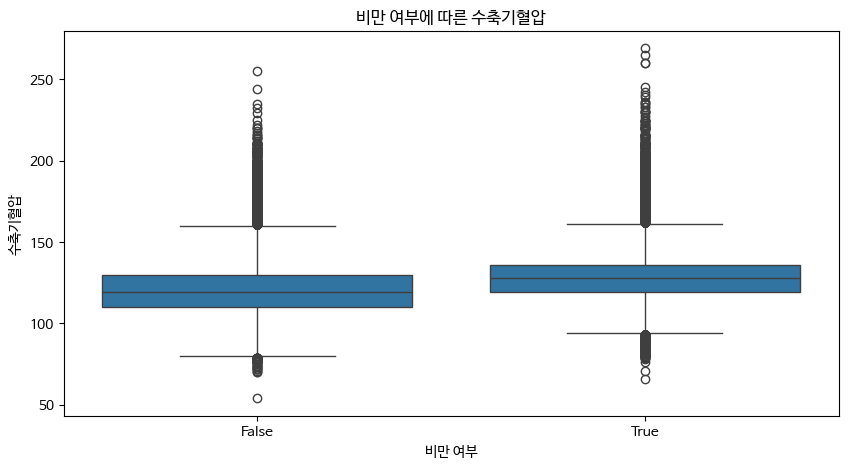

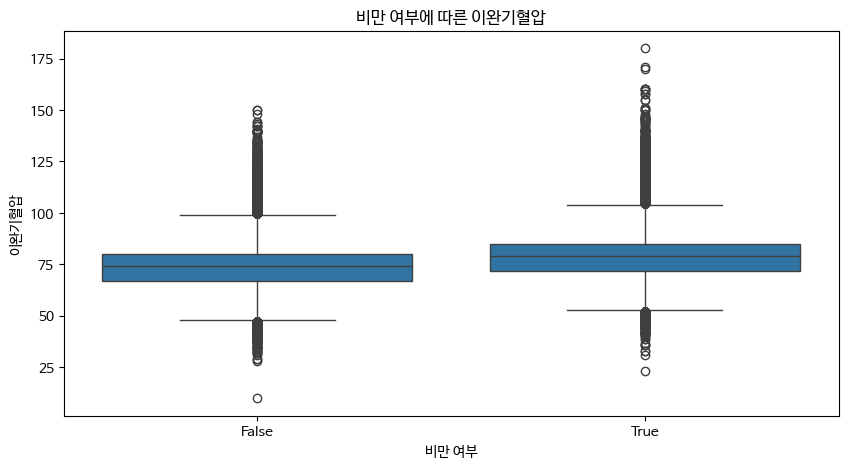

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='비만여부', y='수축기혈압', data=data)
plt.title('비만 여부에 따른 수축기혈압')
plt.xlabel('비만 여부')
plt.ylabel('수축기혈압')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='비만여부', y='이완기혈압', data=data)
plt.title('비만 여부에 따른 이완기혈압')
plt.xlabel('비만 여부')
plt.ylabel('이완기혈압')
plt.show()

##19. 수축기혈압과 식전혈당의 상관관계를 나타내는 산점도를 만드세요.

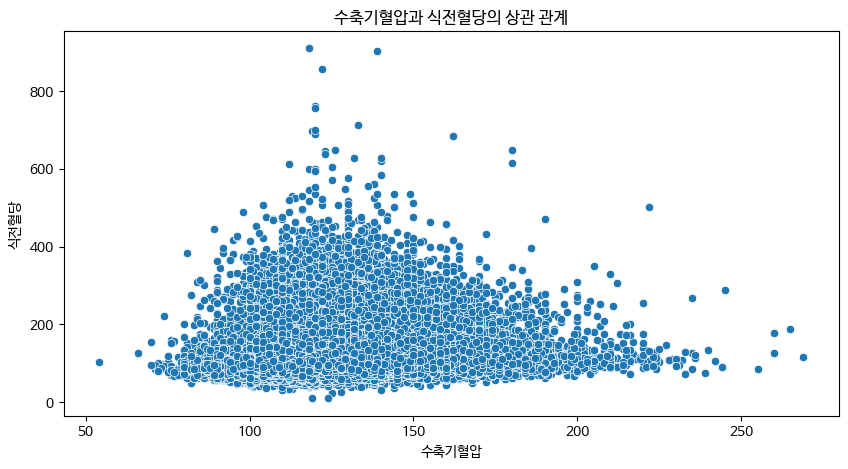

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='수축기혈압', y='식전혈당', data=data)
plt.title('수축기혈압과 식전혈당의 상관 관계')
plt.xlabel('수축기혈압')
plt.ylabel('식전혈당')
plt.show()

##20. 이완기혈압과 식전혈당의 상관관계를 나타내는 산점도를 만드세요.

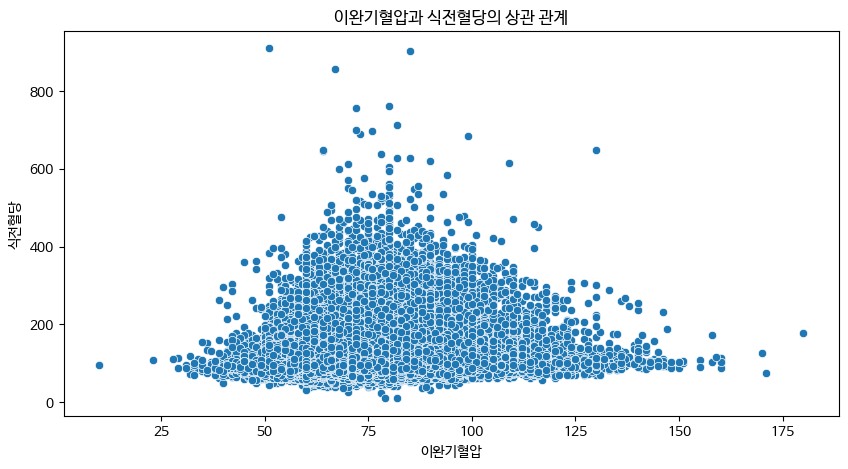

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='이완기혈압', y='식전혈당', data=data)
plt.title('이완기혈압과 식전혈당의 상관 관계')
plt.xlabel('이완기혈압')
plt.ylabel('식전혈당')
plt.show()

##21. 신장과 체중의 상관 관계를 나타내는 산점도를 만드세요.

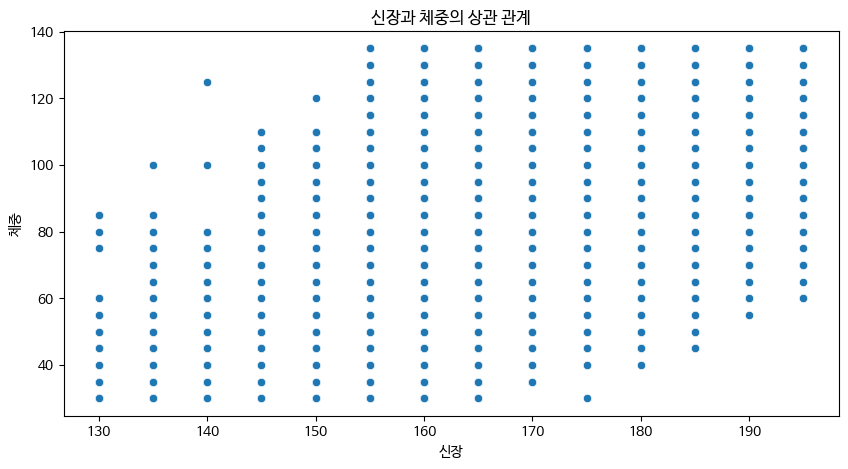

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='신장', y='체중', data=data)
plt.title('신장과 체중의 상관 관계')
plt.xlabel('신장')
plt.ylabel('체중')
plt.show()

##22. 성별에 따른 신장의 박스플롯을 만드세요.

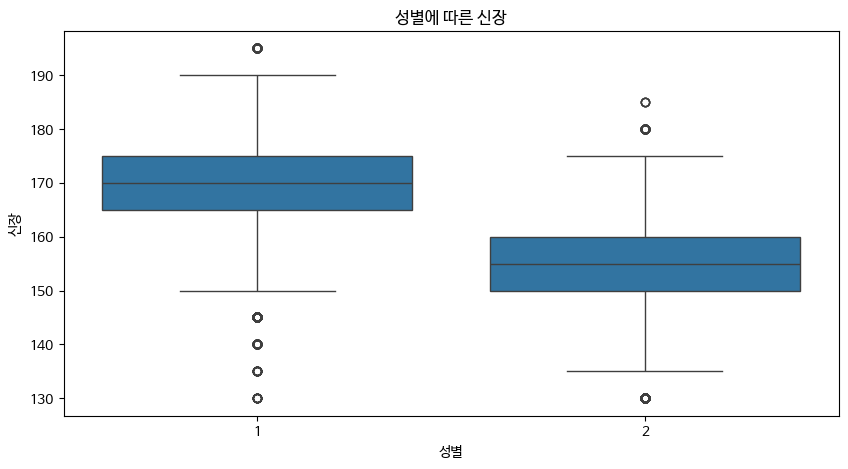

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='성별', y='신장', data=data)
plt.title('성별에 따른 신장')
plt.xlabel('성별')
plt.ylabel('신장')
plt.show()

##23. 신장과 체중의 상관 관계를 나타내는 산점도를 만드세요.

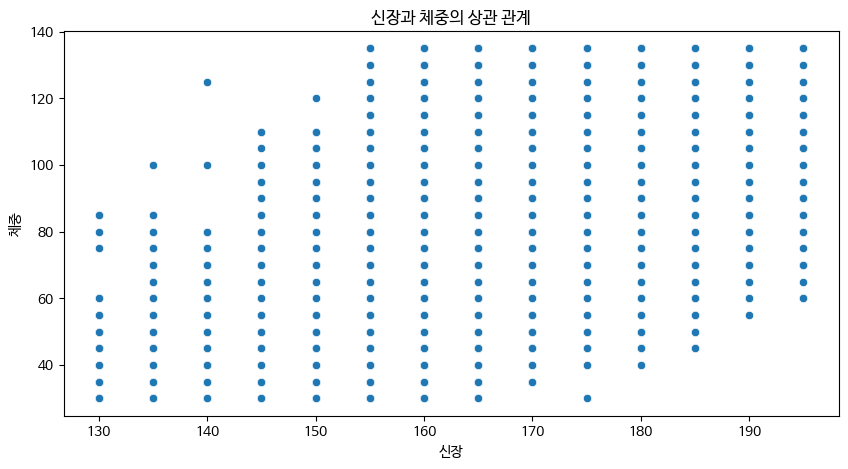

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='신장', y='체중', data=data)
plt.title('신장과 체중의 상관 관계')
plt.xlabel('신장')
plt.ylabel('체중')
plt.show()

##24. 성별에 따른 신장의 박스플롯을 만드세요.

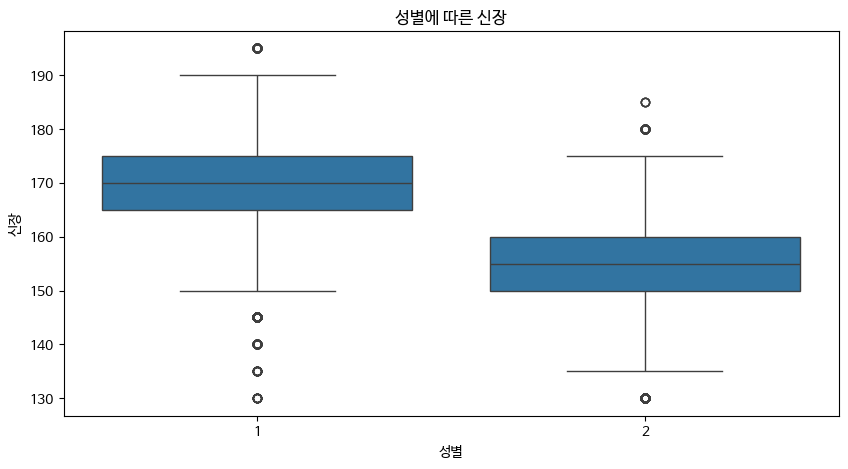

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='성별', y='신장', data=data)
plt.title('성별에 따른 신장')
plt.xlabel('성별')
plt.ylabel('신장')
plt.show()

##25. 혈압에 따른 식전혈당의 박스플롯을 만드세요.

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='혈압', y='식전혈당', data=data)
plt.title('혈압에 따른 식전혈당')
plt.xlabel('혈압')
plt.ylabel('식전혈당')
plt.show()


ValueError: Could not interpret value `혈압` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

##26. 비만여부에 따른 공복혈당의 KDE 플롯을 만드세요.

<ipython-input-108-b97cc0bc8a82>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x='식전혈당', hue='비만여부', shade=True)


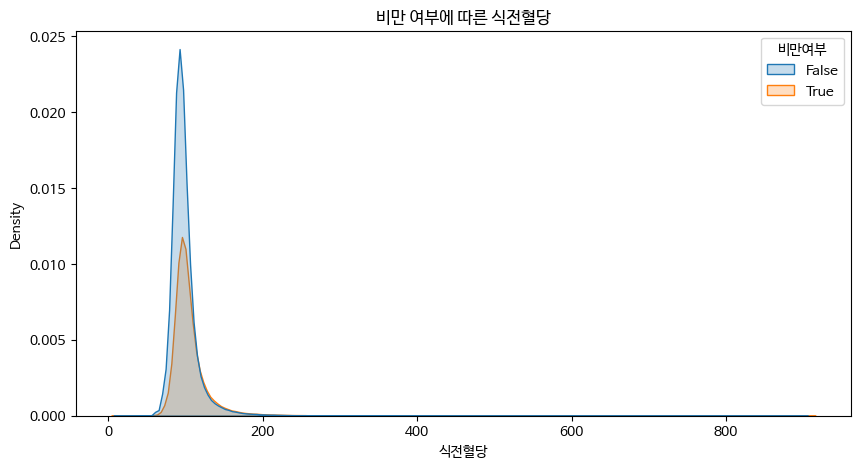

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=data, x='식전혈당', hue='비만여부', shade=True)
plt.title('비만 여부에 따른 식전혈당')
plt.xlabel('식전혈당')
plt.ylabel('Density')
plt.show()

## 27. 연령대코드에 따른 수축기혈압의 박스플롯을 만드세요.

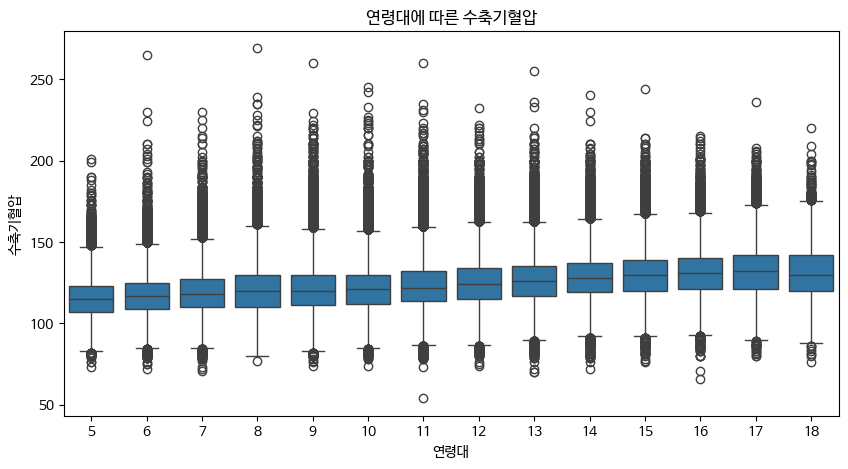

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='연령대코드(5세단위)', y='수축기혈압', data=data)
plt.title('연령대에 따른 수축기혈압')
plt.xlabel('연령대')
plt.ylabel('수축기혈압')
plt.show()


##28. 연령대코드에 따른 이완기혈압의 박스플롯을 만드세요.

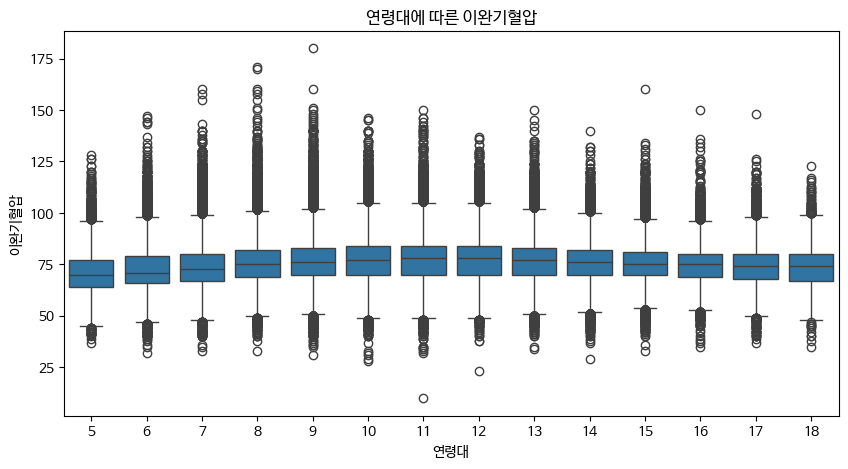

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='연령대코드(5세단위)', y='이완기혈압', data=data)
plt.title('연령대에 따른 이완기혈압')
plt.xlabel('연령대')
plt.ylabel('이완기혈압')
plt.show()

##29. 연령대별 음주 여부를 나타내는 카운트 플롯을 만드세요.

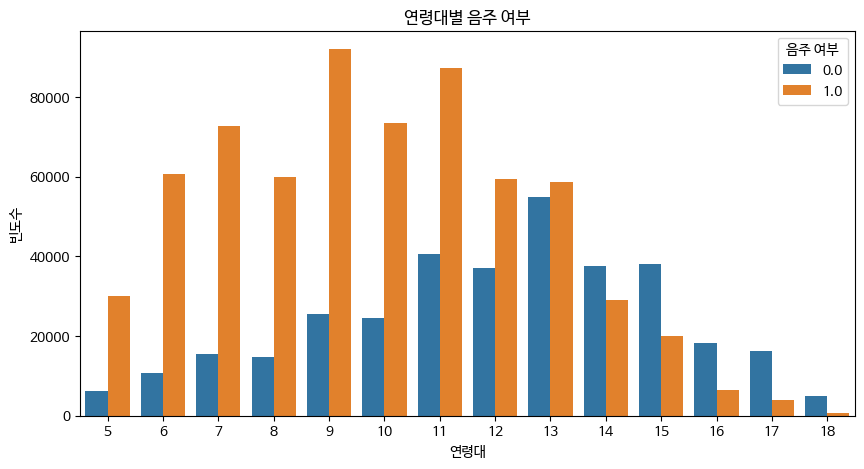

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='연령대코드(5세단위)', hue='음주여부', data=data)
plt.title('연령대별 음주 여부')
plt.xlabel('연령대')
plt.ylabel('빈도수')
plt.legend(title='음주 여부')
plt.show()

##30. 연령대별 평균 음주 여부를 바 차트로 나타내세요.

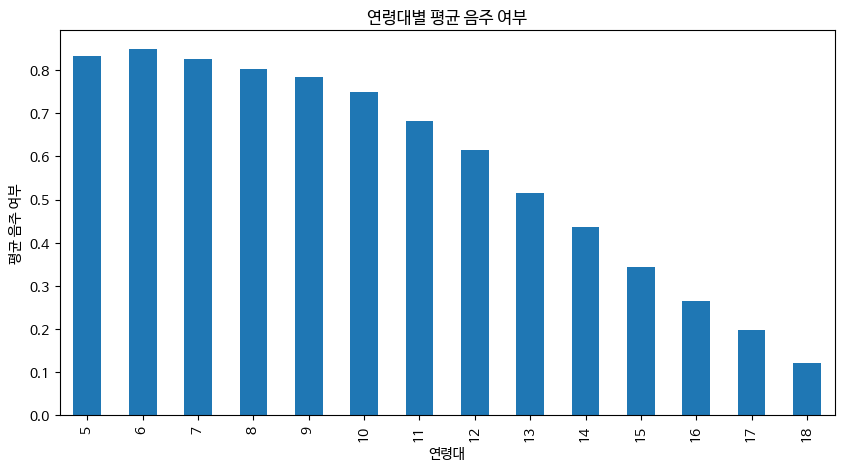

In [ ]:
avg_drinking_by_age = data.groupby('연령대코드(5세단위)')['음주여부'].mean()
plt.figure(figsize=(10, 5))
avg_drinking_by_age.plot(kind='bar')
plt.title('연령대별 평균 음주 여부')
plt.xlabel('연령대')
plt.ylabel('평균 음주 여부')
plt.show()

## 31. 수축기혈압과 체중의 상관 관계를 나타내는 산점도를 만드세요.

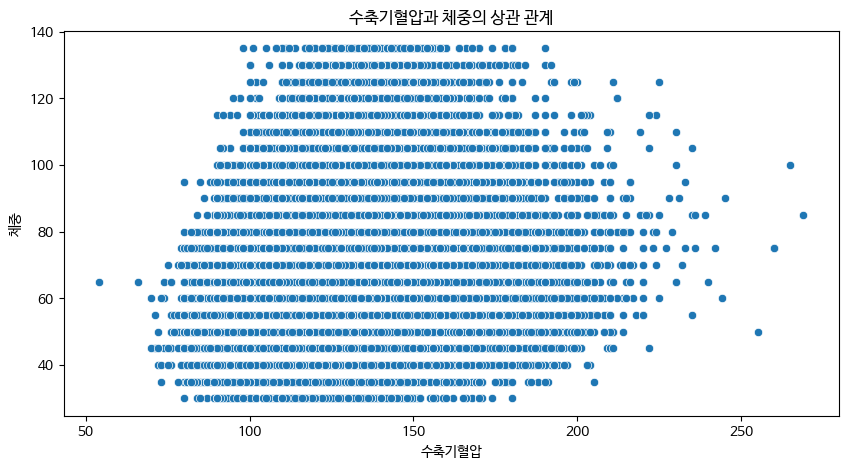

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='수축기혈압', y='체중', data=data)
plt.title('수축기혈압과 체중의 상관 관계')
plt.xlabel('수축기혈압')
plt.ylabel('체중')
plt.show()

##32. 이완기혈압과 체중의 상관관계를 나타내는 산점도를 만드세요.

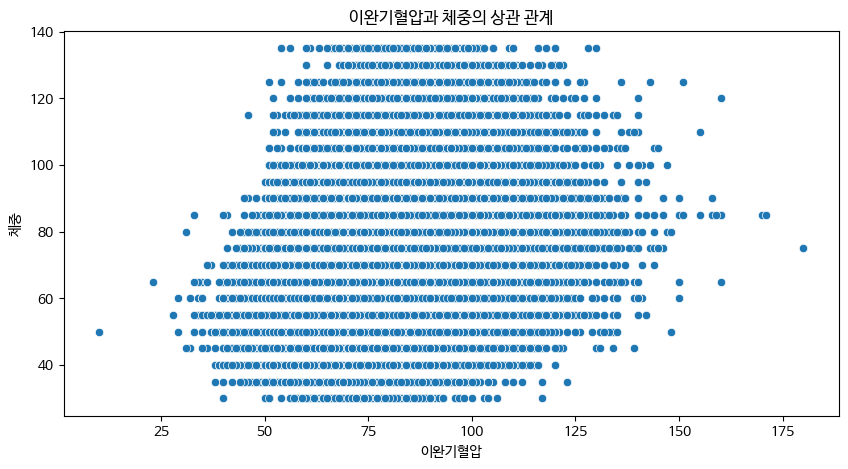

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='이완기혈압', y='체중', data=data)
plt.title('이완기혈압과 체중의 상관 관계')
plt.xlabel('이완기혈압')
plt.ylabel('체중')
plt.show()

##33. 연령대별 식전혈당의 평균을 나타내는 바 차트를 만드세요.

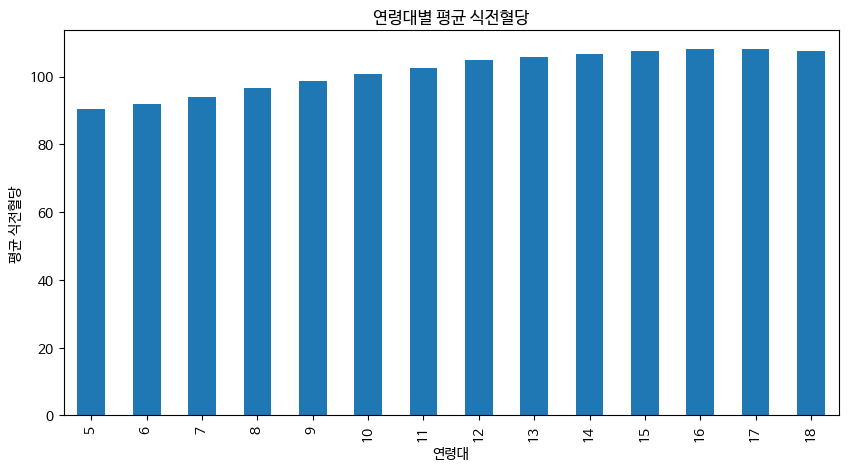

In [ ]:
avg_glucose_by_age = data.groupby('연령대코드(5세단위)')['식전혈당'].mean()
plt.figure(figsize=(10, 5))
avg_glucose_by_age.plot(kind='bar')
plt.title('연령대별 평균 식전혈당')
plt.xlabel('연령대')
plt.ylabel('평균 식전혈당')
plt.show()

##34. 연령대별 식전혈당의 박스플롯을 만드세요.

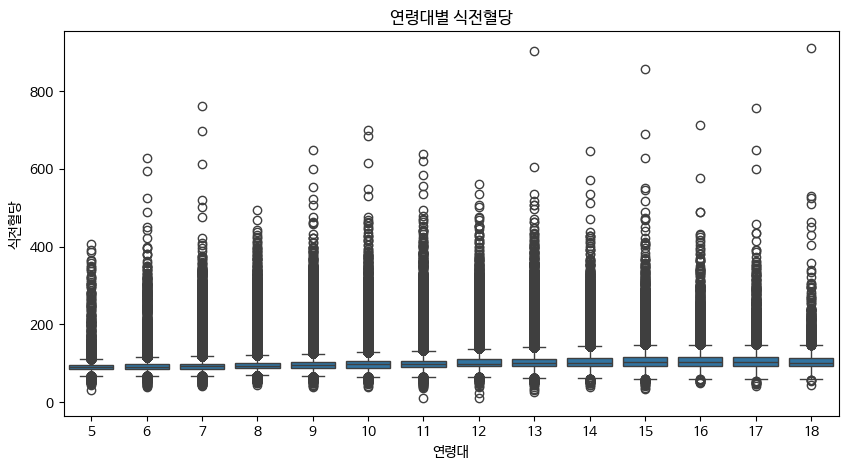

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='연령대코드(5세단위)', y='식전혈당', data=data)
plt.title('연령대별 식전혈당')
plt.xlabel('연령대')
plt.ylabel('식전혈당')
plt.show()

## 35. 흡연 상태와 혈압 분석
- 흡연 상태에 따른 수축기혈압의 박스 플롯을 만드세요.
- 흡연 상태에 따른 이완기 혈압의 박스 플롯을 만드세요.

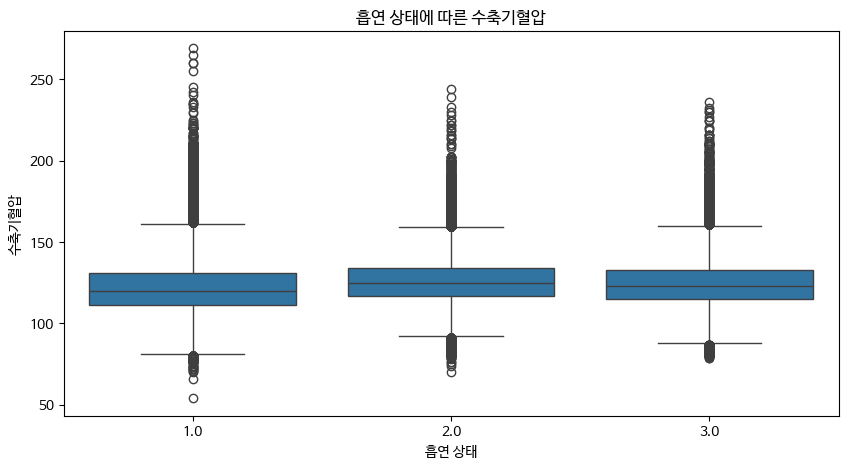

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='흡연상태', y='수축기혈압', data=data)
plt.title('흡연 상태에 따른 수축기혈압')
plt.xlabel('흡연 상태')
plt.ylabel('수축기혈압')
plt.show()

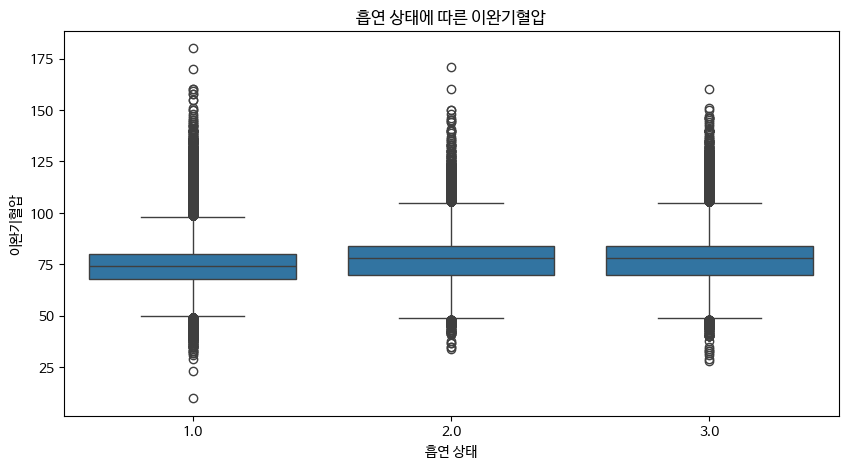

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='흡연상태', y='이완기혈압', data=data)
plt.title('흡연 상태에 따른 이완기혈압')
plt.xlabel('흡연 상태')
plt.ylabel('이완기혈압')
plt.show()